In [3]:
import torch
import torch.nn as nn
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np
from torchvision.utils import make_grid
from torch.utils.data import DataLoader, random_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import seaborn as sns
import os
from PIL import Image
from torch.utils.tensorboard import SummaryWriter

In [4]:
import tensorflow as tf

if tf.test.gpu_device_name():
    print(f"GPU is available: {tf.test.gpu_device_name()}")
else:
    print("GPU not available, using CPU instead.")


GPU not available, using CPU instead.


In [5]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [6]:
base_path = '/content/drive/My Drive/Covid19-dataset'
print(os.listdir(base_path))

['test', 'train']


Train Class Distribution: {'Covid': 111, 'Normal': 70, 'Viral Pneumonia': 70}
Test Class Distribution: {'Covid': 26, 'Normal': 20, 'Viral Pneumonia': 20}


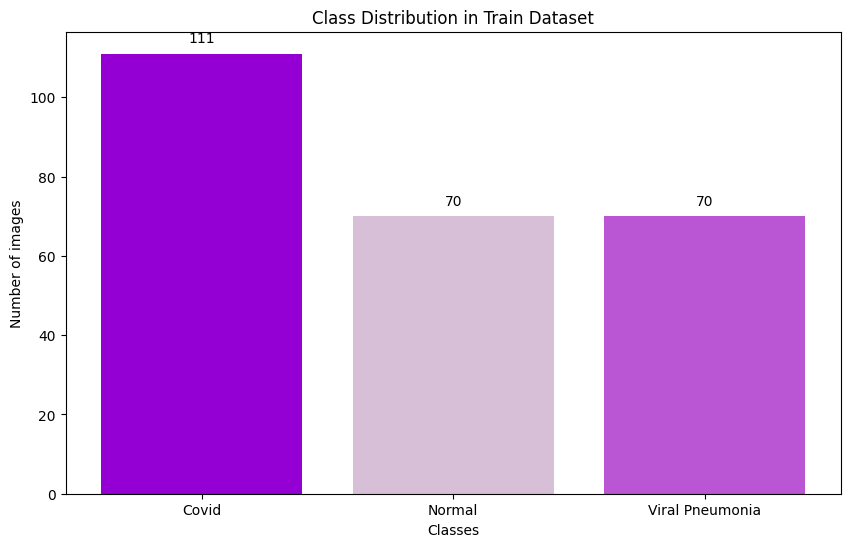

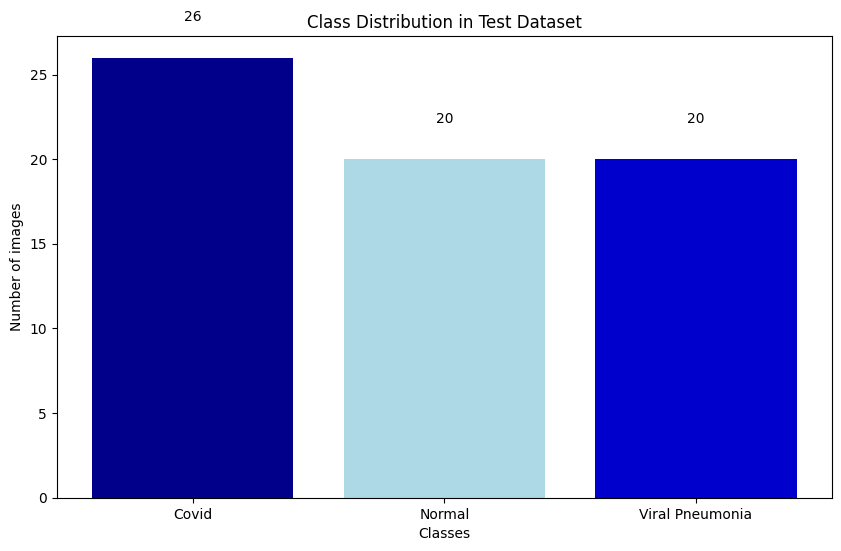

In [12]:

# Paths to the datasets in Google Drive
train_dataset_path = '/content/drive/My Drive/Covid19-dataset/train'
test_dataset_path = '/content/drive/My Drive/Covid19-dataset/test'

# Function to get class distribution
def get_class_distribution(dataset_path):
    dataset = datasets.ImageFolder(root=dataset_path, transform=transforms.ToTensor())
    class_counts = {}
    for _, label in dataset:
        class_name = dataset.classes[label]
        if class_name in class_counts:
            class_counts[class_name] += 1
        else:
            class_counts[class_name] = 1
    return class_counts

# Get class distributions for both folders
train_class_distribution = get_class_distribution(train_dataset_path)
test_class_distribution = get_class_distribution(test_dataset_path)

print("Train Class Distribution:", train_class_distribution)
print("Test Class Distribution:", test_class_distribution)

# Function to plot class distribution
def plot_class_distribution(class_distribution, title, color_map):
    classes = list(class_distribution.keys())
    counts = list(class_distribution.values())

    plt.figure(figsize=(10, 6))
    bars = plt.bar(classes, counts, color=[color_map[cls] for cls in classes])

    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval + 2, int(yval), ha='center', va='bottom')

    plt.xlabel('Classes')
    plt.ylabel('Number of images')
    plt.title(title)
    plt.show()

# Color maps for train and test datasets
train_color_map = {
    'Covid': 'darkviolet',
    'Viral Pneumonia': 'mediumorchid',
    'Normal': 'thistle'
}

test_color_map = {
    'Covid': 'darkblue',
    'Viral Pneumonia': 'mediumblue',
    'Normal': 'lightblue'
}

# Plot class distributions for train and test datasets
plot_class_distribution(train_class_distribution, 'Class Distribution in Train Dataset', train_color_map)
plot_class_distribution(test_class_distribution, 'Class Distribution in Test Dataset', test_color_map)